In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    country = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    #print(coordinate)
    #print(coordinate[0],coordinate[1])
    #print(city)
    #print(country)
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
#    print(city_url)

In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50 and i<100 ):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)
    # Add 1 to the record count.
    record_count += 1
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    city_weather = requests.get(city_url).json()
   

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
   
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=kvitok
Processing Record 2 of Set 1 | kvitok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=clyde
Processing Record 3 of Set 1 | clyde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=souillac
Processing Record 4 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=mataura
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=qaqortoq
Processing Record 6 of Set 1 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=pietersburg
Processing Record 7 of Set 1 | pietersburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d9

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=port+elizabeth
Processing Record 5 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=nakhon+phanom
Processing Record 6 of Set 2 | nakhon phanom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=port+hardy
Processing Record 7 of Set 2 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=aban
Processing Record 8 of Set 2 | aban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=jamestown
Processing Record 9 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=biak
Processing Record 10 of Set 2 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c4

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=tasiilaq
Processing Record 59 of Set 2 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=petrolina
Processing Record 60 of Set 2 | petrolina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=namtsy
Processing Record 61 of Set 2 | namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=udala
Processing Record 62 of Set 2 | udala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=olinda
Processing Record 63 of Set 2 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=caraballeda
Processing Record 64 of Set 2 | caraballeda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=mehamn
Processing Record 112 of Set 2 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=saint+george
Processing Record 113 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=miranda
Processing Record 114 of Set 2 | miranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=chunskiy
Processing Record 115 of Set 2 | chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=grindavik
Processing Record 116 of Set 2 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=sitka
Processing Record 117 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c4515

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=dikson
Processing Record 166 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=havre-saint-pierre
Processing Record 167 of Set 2 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=dwarka
Processing Record 168 of Set 2 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=kalbay
Processing Record 169 of Set 2 | kalbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=kouango
Processing Record 170 of Set 2 | kouango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=haines+junction
Processing Record 171 of Set 2 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imp

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=zhaodong
Processing Record 218 of Set 2 | zhaodong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=atar
Processing Record 219 of Set 2 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=yarmouth
Processing Record 220 of Set 2 | yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=novosergiyevka
Processing Record 221 of Set 2 | novosergiyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=tomatlan
Processing Record 222 of Set 2 | tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=morondava
Processing Record 223 of Set 2 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=bayir
Processing Record 270 of Set 2 | bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=lewisporte
Processing Record 271 of Set 2 | lewisporte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=qalyub
Processing Record 272 of Set 2 | qalyub
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=samusu
Processing Record 273 of Set 2 | samusu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=carballo
Processing Record 274 of Set 2 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=lazaro+cardenas
Processing Record 275 of Set 2 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=nikolayevka
Processing Record 322 of Set 2 | nikolayevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=shintomi
Processing Record 323 of Set 2 | shintomi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=bambanglipuro
Processing Record 324 of Set 2 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=villa+bruzual
Processing Record 325 of Set 2 | villa bruzual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=marienburg
Processing Record 326 of Set 2 | marienburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=barra+do+garcas
Processing Record 327 of Set 2 | barra do garcas
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=la+ronge
Processing Record 375 of Set 2 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=agadez
Processing Record 376 of Set 2 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=georgetown
Processing Record 377 of Set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=panguna
Processing Record 378 of Set 2 | panguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=tateyama
Processing Record 379 of Set 2 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=opuwo
Processing Record 380 of Set 2 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=touros
Processing Record 427 of Set 2 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=basoko
Processing Record 428 of Set 2 | basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=tire
Processing Record 429 of Set 2 | tire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=tessalit
Processing Record 430 of Set 2 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=nylstroom
Processing Record 431 of Set 2 | nylstroom
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=hunza
Processing Record 432 of Set 2 | hunza
City not found. Skipping...
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=trenggalek
Processing Record 481 of Set 2 | trenggalek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=charters+towers
Processing Record 482 of Set 2 | charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=channel-port+aux+basques
Processing Record 483 of Set 2 | channel-port aux basques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=san+quintin
Processing Record 484 of Set 2 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=nantucket
Processing Record 485 of Set 2 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=ulaangom
Processing Record 486 of Set 2 | ulaangom
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=rio+gallegos
Processing Record 533 of Set 2 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=yiyang
Processing Record 534 of Set 2 | yiyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=ryotsu
Processing Record 535 of Set 2 | ryotsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=cabedelo
Processing Record 536 of Set 2 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=hervey+bay
Processing Record 537 of Set 2 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1&q=mizan+teferi
Processing Record 538 of Set 2 | mizan teferi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kvitok,56.0724,98.4813,-4.00,98,38,4.94,RU,2022-01-08 12:06:57
1,Clyde,41.3042,-82.9752,16.21,82,52,11.03,US,2022-01-08 12:06:58
2,Souillac,-20.5167,57.5167,82.36,76,100,0.85,MU,2022-01-08 12:06:58
3,Mataura,-46.1927,168.8643,57.47,83,94,2.42,NZ,2022-01-08 12:06:59
4,Qaqortoq,60.7167,-46.0333,12.70,84,2,5.75,GL,2022-01-08 12:06:59
5,Pietersburg,-23.9045,29.4688,66.60,40,23,12.88,ZA,2022-01-08 12:05:23
6,Gannan,47.9147,123.5031,0.70,94,56,4.29,CN,2022-01-08 12:07:00
7,Hilo,19.7297,-155.0900,69.53,83,100,4.61,US,2022-01-08 12:06:54
8,Margate,51.3813,1.3862,49.96,87,100,4.00,GB,2022-01-08 12:07:00
9,Ostrovnoy,68.0531,39.5131,13.17,86,70,23.02,RU,2022-01-08 12:07:01


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

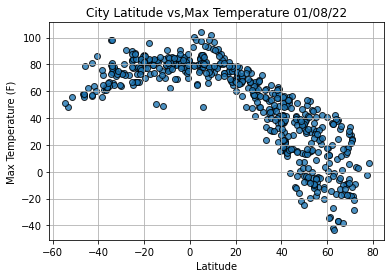

In [10]:
# Import time module
 #import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the othe rgraph properties.
plt.title(f"City Latitude vs,Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

    # Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


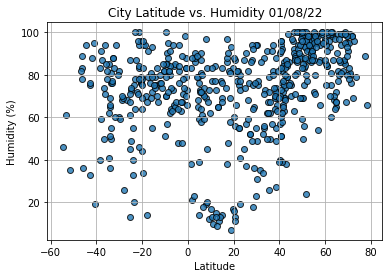

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


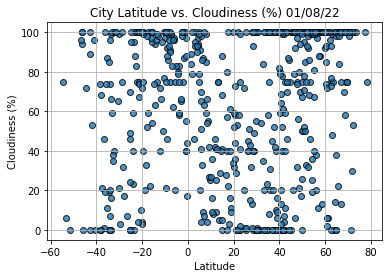

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

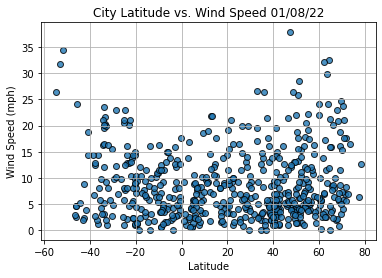

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kvitok,56.0724,98.4813,-4.00,98,38,4.94,RU,2022-01-08 12:06:57
1,Clyde,41.3042,-82.9752,16.21,82,52,11.03,US,2022-01-08 12:06:58
4,Qaqortoq,60.7167,-46.0333,12.70,84,2,5.75,GL,2022-01-08 12:06:59
6,Gannan,47.9147,123.5031,0.70,94,56,4.29,CN,2022-01-08 12:07:00
7,Hilo,19.7297,-155.0900,69.53,83,100,4.61,US,2022-01-08 12:06:54


In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

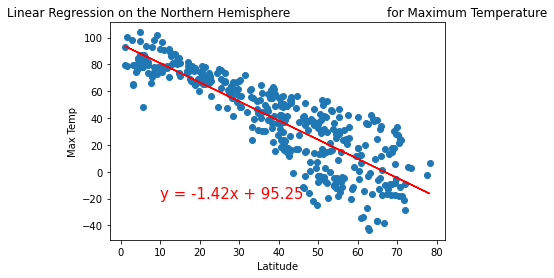

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

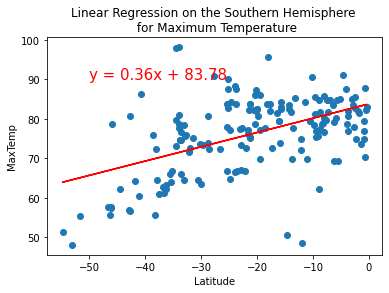

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'MaxTemp',(-50,90))
                       
                       

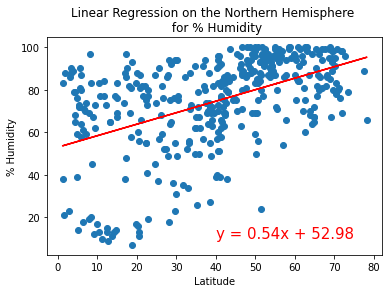

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
                        
                      

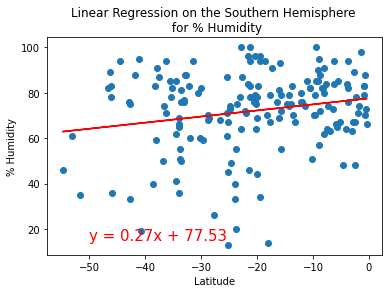

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity','% Humidity',(-50,15))
                       
                        

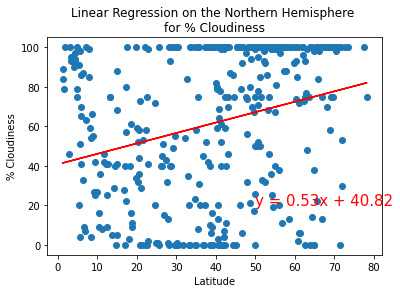

In [21]:
#Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

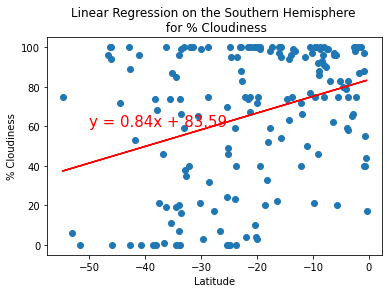

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% Cloudiness',(-50,60))
                       
                       

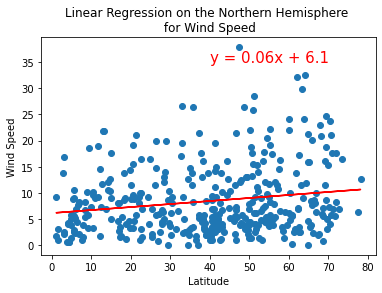

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))
                        
                       

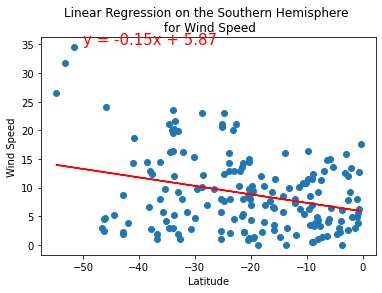

In [24]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed','Wind Speed',(-50,35))
                        
                       